In [1]:
import numpy as np
import logging
import sys
from matplotlib import pyplot as plt

%matplotlib inline
sys.path.append("../")

import torch
from torchvision.datasets import MNIST
from torchvision import transforms

from aef.models.aef import LinearAutoencoder, ConvolutionalAutoencoder, DenseAutoencoder
from aef.trainer import AutoencoderTrainer, AutoencoderFlowTrainer
from aef.losses import nll, mse

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)


## Data

In [2]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist = MNIST('./data', download=True, transform=img_transform)

## Train autoencoder

In [3]:
ae = DenseAutoencoder(latent_dim=2)

In [4]:
trainer = AutoencoderTrainer(ae, output_filename="output/dense_phase1")
trainer.train(
    dataset=mnist,
    loss_functions=[mse],
    loss_labels=["MSE"],
    batch_size=256,
    epochs=10,
    verbose="all",
    initial_lr=1.e-3,
    final_lr=1.e-5
)

12:44 aef.trainer          INFO    Epoch   1: train loss  0.30198 (MSE:  0.302)
12:44 aef.trainer          INFO               val. loss   0.23912 (MSE:  0.239)
12:44 aef.trainer          INFO    Epoch   2: train loss  0.23273 (MSE:  0.233)
12:44 aef.trainer          INFO               val. loss   0.22841 (MSE:  0.228)
12:45 aef.trainer          INFO    Epoch   3: train loss  0.22434 (MSE:  0.224)
12:45 aef.trainer          INFO               val. loss   0.22149 (MSE:  0.221)
12:45 aef.trainer          INFO    Epoch   4: train loss  0.21841 (MSE:  0.218)
12:45 aef.trainer          INFO               val. loss   0.21683 (MSE:  0.217)
12:45 aef.trainer          INFO    Epoch   5: train loss  0.21503 (MSE:  0.215)
12:45 aef.trainer          INFO               val. loss   0.21468 (MSE:  0.215)
12:46 aef.trainer          INFO    Epoch   6: train loss  0.21345 (MSE:  0.213)
12:46 aef.trainer          INFO               val. loss   0.21362 (MSE:  0.214)
12:46 aef.trainer          INFO    Epoch

(array([0.30198051, 0.23272956, 0.2243369 , 0.21841371, 0.21502502,
        0.213448  , 0.21263384, 0.21216888, 0.21189044, 0.21174586]),
 array([0.23911787, 0.22841314, 0.22149008, 0.21682628, 0.21468475,
        0.21361571, 0.21304289, 0.21270368, 0.21251934, 0.21241088]))

In [5]:
trainer = AutoencoderFlowTrainer(ae, output_filename="output/dense_phase2")
trainer.train(
    dataset=mnist,
    loss_functions=[nll],
    loss_labels=["NLL"],
    batch_size=256,
    epochs=10,
    verbose="all",
    initial_lr=1.e-3,
    final_lr=1.e-5,
    parameters=ae.flow.parameters()
)

12:49 aef.trainer          INFO    Epoch   1: train loss  1.98317 (NLL:  1.983)
12:49 aef.trainer          INFO               val. loss   1.96825 (NLL:  1.968)
12:49 aef.trainer          INFO    Epoch   2: train loss  1.93830 (NLL:  1.938)
12:49 aef.trainer          INFO               val. loss   1.97616 (NLL:  1.976)
12:49 aef.trainer          INFO    Epoch   3: train loss  1.92461 (NLL:  1.925)
12:49 aef.trainer          INFO               val. loss   1.93562 (NLL:  1.936)
12:50 aef.trainer          INFO    Epoch   4: train loss  1.91875 (NLL:  1.919)
12:50 aef.trainer          INFO               val. loss   1.98195 (NLL:  1.982)
12:50 aef.trainer          INFO    Epoch   5: train loss  1.91512 (NLL:  1.915)
12:50 aef.trainer          INFO               val. loss   1.94368 (NLL:  1.944)
12:51 aef.trainer          INFO    Epoch   6: train loss  1.91210 (NLL:  1.912)
12:51 aef.trainer          INFO               val. loss   1.92308 (NLL:  1.923)
12:51 aef.trainer          INFO    Epoch

(array([1.98317009, 1.93829658, 1.92461235, 1.91874852, 1.91512339,
        1.91209625, 1.9132005 , 1.91137721, 1.91039158, 1.91235368]),
 array([1.96825011, 1.97616143, 1.9356211 , 1.98195045, 1.94368265,
        1.92308191, 1.93424532, 1.92789325, 1.9344809 , 1.9533459 ]))

## Visualize latent space

In [6]:
x = torch.cat([mnist[i][0].unsqueeze(0) for i in range(1000)], dim=0)
y = np.asarray([mnist[i][1] for i in range(1000)])

In [7]:
h, u = ae.latent(x)
x_out = ae.decoder(h)
h = h.detach().numpy().reshape((-1,2))
u = u.detach().numpy().reshape((-1,2))

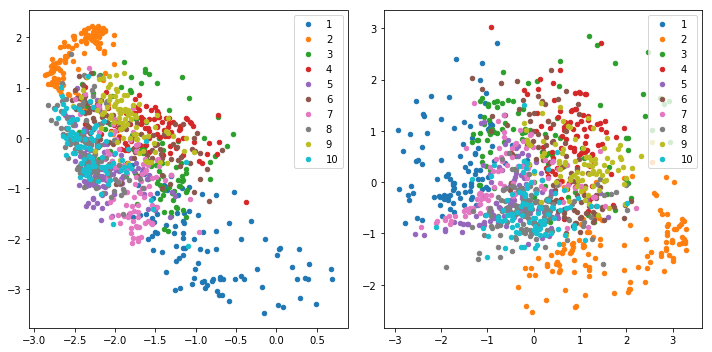

In [8]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
for i in range(10):
    plt.scatter(h[y==i][:,0], h[y==i][:,1], c="C{}".format(i), s=20., label="{}".format(i+1))
plt.legend()
    
ax = plt.subplot(1,2,2)
for i in range(10):
    plt.scatter(u[y==i][:,0], u[y==i][:,1], c="C{}".format(i), s=20., label="{}".format(i+1))
plt.legend()

plt.tight_layout()
plt.show()


## Visualize reconstruction

In [9]:
x = torch.cat([mnist[i][0].unsqueeze(0) for i in range(1000)], dim=0)
y = np.asarray([mnist[i][1] for i in range(1000)])

In [10]:
h = ae.encoder(x)
x_out = ae.decoder(h)
h = h.detach().numpy()
x_out = x_out.detach().numpy()

RuntimeError: size mismatch, m1: [28000 x 28], m2: [784 x 100] at /Users/soumith/mc3build/conda-bld/pytorch_1549593514549/work/aten/src/TH/generic/THTensorMath.cpp:940

In [ ]:
fig = plt.figure(figsize=(12,12))

for i in range(18):
    ax = plt.subplot(6, 6, 2*i + 1)
    plt.imshow(x[i].reshape((28,28)))
    ax = plt.subplot(6, 6, 2*i + 2)
    plt.imshow(x_out[i].reshape((28,28)))
        
plt.tight_layout()
plt.show()